In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Import custom class and functions
from loss_surface import LossSurface
from momentum import Momentum, visualize_descent
%matplotlib inline


In [2]:
# Function to compute response given predictor
def f(x):
    return np.cos(3*np.pi*x)/x
    

In [3]:
# Function to compute the derivative
def der_f(x):
    return -(3*np.pi*x*np.sin(3*np.pi*x)+np.cos(3*np.pi*x))/x**2
    

In [4]:
# Helper function to perform clipping
# This function retuns the gradient with a magnitude <=clip_threshold
def clip(g, clip_threshold=8):
    if np.abs(g) > clip_threshold:
        g = g*clip_threshold/np.abs(g)
    return g
    

In [5]:
# Helper function to get tangent points
def get_tangent_line(x, x_range=.5):
    y = f(x)
    m = der_f(x)
    x1, y1 = x, y
    x = np.linspace(x1-x_range/2, x1+x_range/2, 50)
    y = m*(x-x1)+y1
    return x, y, m
    

In [6]:
# Helper function to plot the data
def plot_it(cur_x, title='', ax=plt):
    y = f(x)
    ax.plot(x,y)
    ax.scatter(cur_x, f(cur_x), c='r', s=80, alpha=1);
    x_tan, y_tan, der = get_tangent_line(cur_x)
    ax.plot(x_tan, y_tan, ls='--', c='r')
    # indicate when if our location is outside the x range
    if cur_x > x.max():
        ax.axvline(x.max(), c='r', lw=3)
        ax.arrow(x.max()/1.6, y.max()/2, x.max()/5, 0, color='r', head_width=.25)
    if cur_x < x.min():
        ax.axvline(x.min(), c='r', lw=3)
        ax.arrow(x.max()/2.5, y.max()/2, -x.max()/5, 0, color='r', head_width=.25)
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(-3.5, 3.5)
    ax.set_title(title)
    

In [7]:
# Get predictor data
x = np.linspace(0.1,3, 200)


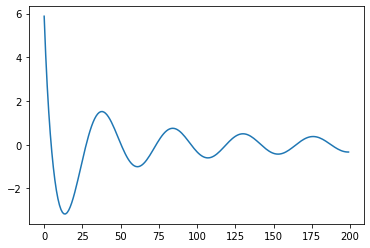

In [9]:
plt.plot(f(x))

### ⏸ Which among the following is true about the momentum parameter $\alpha$ defined here?


#### A. As the mometum is decreased, the time to converge most likely increases because the oscillation damping is reduced.
#### B. As the mometum is decreased, the time to converge most likely decreases because the weightage given to the previous values is lower.
#### C. As the mometum is increased, the time to converge most likely increases because the weightage given to the previous values is higher.
#### D. As the mometum is decreased, the time to converge most likely increases because the oscillation damping is increased leading to smoother descent.

In [10]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer1 = 'A'


In [11]:
# Funtion to compute gradient descent with momentum
def gradient_descent(cur_x, learning_rate, decay_rate, epsilon, nu, alpha, num_iter):

    # Plotting one panel per gradient descent iteration
    fig, axs = plt.subplots(num_iter//3, 3, figsize=(15,6), sharey=True)

    # To create sub-panels
    for i, ax in enumerate(axs.ravel()):
        plot_it(cur_x, title=f"{i} step{'' if i == 1 else 's'}", ax=ax)

        # Store the current x value before change in a separate variable
        prev_x = cur_x

        # Compute the derivative of the current x
        der_cur_x = der_f(cur_x)

        # Get the gradient of the derivative of x using clipping
        delta = clip(der_cur_x)

        # There is no momentum for the first iteration
        nu = delta if i == 0 else alpha*nu + (1-alpha)*delta 

        # Update the x-value using the momentum and learning rate
        cur_x = cur_x-learning_rate*nu

        # Update the learning rate based on the decay rate
        learning_rate = learning_rate*decay_rate

        # Stop algorithm if the change is below threshold
        if np.abs(cur_x - prev_x) <= epsilon:
            for ax in axs.ravel()[i+1:]:
                # Hide unused subplots
                ax.axis('off')
            break

    plt.tight_layout()
    

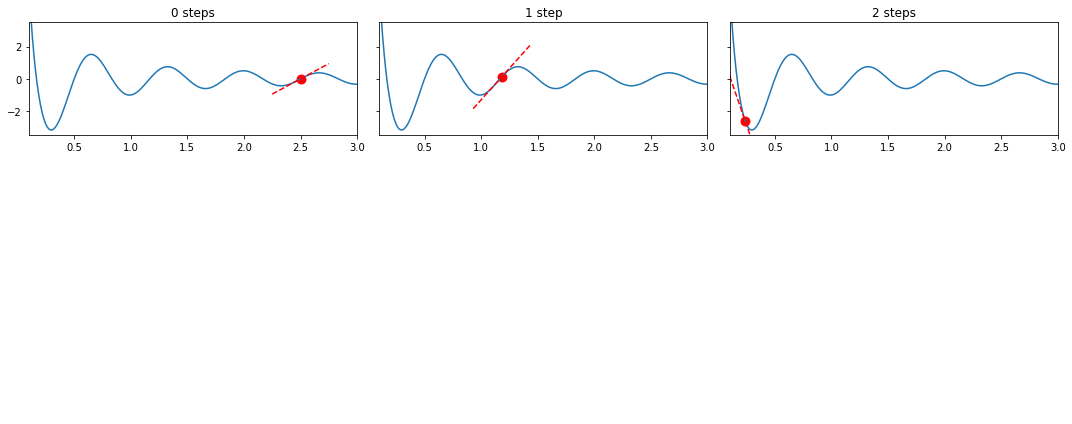

In [12]:
### edTest(test_momentum) ###

# Set the initial value of x
cur_x = 2.5 

# The learning rate for gradient descent
learning_rate = 0.35

# The decay rate determines the percent by which the learning rate reduces each step
decay_rate = 0.5

# Setting the epsilon value
epsilon = 0.025

# Set the initial momentum to zero to indicate no 'memory'
nu = 0

# Momentum weighting parameter
alpha = 0.6

# Iterator for plots
num_iter = 10

# Call the gradient_descent function to perform gradient descent with momentum 
gradient_descent(cur_x, learning_rate, decay_rate, epsilon, nu, alpha, num_iter)


## Mindchow 🍲

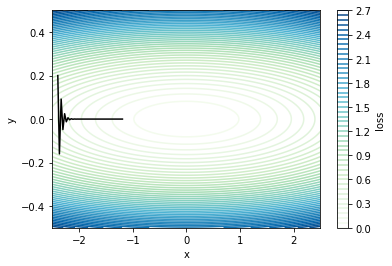

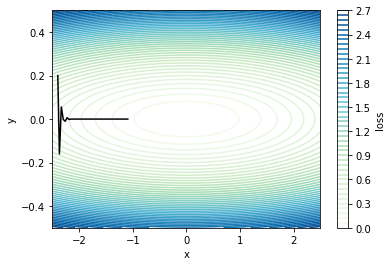

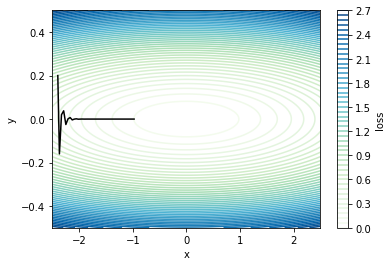

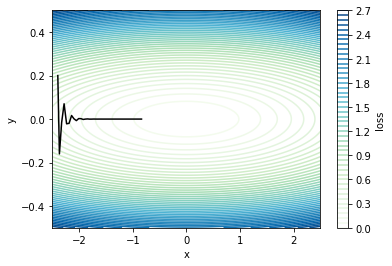

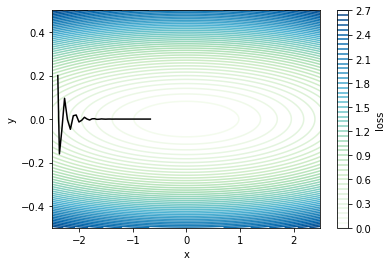

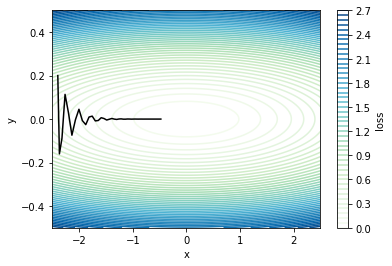

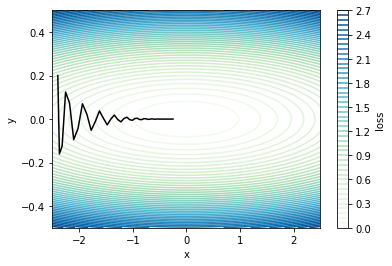

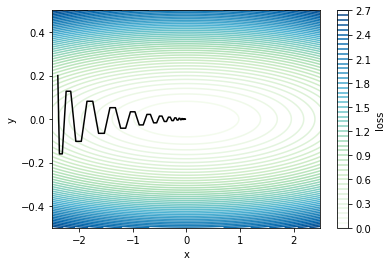

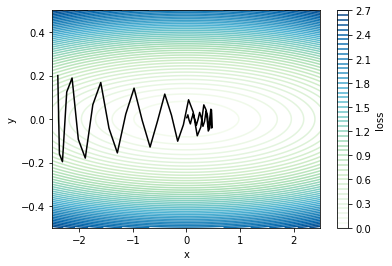

In [18]:
### edTest(test_chow2) ###
# Try a list of different alpha values with a single learning rate and see how that affects convergence in 2 dimensions

learning_rate = 0.1
iteration = 50
alphas = np.arange(0.1,1,0.1)

# Helper code to visualise the data
visualize_descent(learning_rate=learning_rate, iteration=iteration, alphas=alphas)
